# TCTC 

## Backgorund

TCTC stands for *Temporal Communities by Trajectory Clustering*. 
It is an algorithm designed to find temporal communities on time series data.

The kind of data needed for TCTC are: 

1. Multiple time series. 
2. The time series are from nodes in a network. 

Most community detection requires to first create an "edge inference" step where the edges of the different nodes are first calculated. 

TCTC first finds clusters of trajectories in the time series without inferring edges. A trajectory is a time series moving through some space. 
Trajectory clustering tries to group together nodes that have similar paths through a space. 

The hyperparameters of TCTC dictate what type of trajectory is found in the data. There are four hyperparameters: 

1. A maximum distance parameter ($\epsilon$). The distance between all nodes part of the same trajectory must be $\epsilon$ or lower.  
2. A minimum size parameter ($\sigma$). All trajectories must include at least $\sigma$ many nodes. 
3. A minimum time parameter ($\tau$). All trajectories must persist for $\tau$ time-points. 
4. A tolerance parameter ($\kappa$). $\kappa$ consecutive "exception" time-points can exist before the trajectory ends.  

## Outline

This example shows only how TCTC is run and how the different hyperparameters effect the community detection. 
These hyperparameters can be trained (saved for another example).

## Read more

TCTC is outlined in more detail in [this article](https://www.biorxiv.org/content/10.1101/617027v1)


## TCTC - example

We will start by generating some data and importing everything we need. 

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from teneto.communitydetection import tctc 
import pandas as pd


Failed to import duecredit due to No module named 'duecredit'
/home/william/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/william/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/william/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = np.array([[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1], 
    [0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 1], 
    [1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0], [-1, 0, 1, 1, 0, -1, 0, -1, 0, 2, 1, 0, -1]], dtype=float)
data = data.transpose()
np.random.seed(2019)
data += np.random.uniform(-0.2, 0.2, data.shape)


(13, 4)


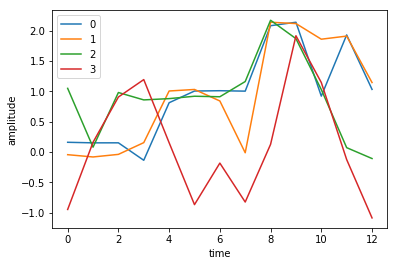

In [3]:
# Lets have a look at the data
fig, ax = plt.subplots(1)
p = ax.plot(data)
ax.legend(p, [0,1,2,3])
ax.set_xlabel('time')
ax.set_ylabel('amplitude')
print(data.shape)




There are two different outputs that TCTC can produce. 
TCTC allows for multilabel communities (i.e. the same node can belong to multiple communities).
The output of TCTC can either be: 

1. As a binary array (dimensions: node,node,time) where each 1 designates that two nodes are in the same community. 
2. As a dataframe where each row is a community. 

The default output is option one. 

So let us run TCTC on the data we have above. 

In [4]:
paramaters = {
    'epsilon': 0.5,
    'tau': 3,
    'sigma': 2,
    'kappa': 0
}
tctc_array = tctc(data, **paramaters)
print(tctc_array.shape)


(4, 4, 13)


For now ignore the values in the "parameters" dictionary, we will go through that later. 

In order to get the dataframe output, just add output='df'.

In [5]:
paramaters = {
    'epsilon': 0.5,
    'tau': 3,
    'sigma': 2,
    'kappa': 0
}
tctc_df = tctc(data, **paramaters, output='df')
print(tctc_df.head())



   community  start  end  size  length
0     [0, 1]      0    7   2.0       7
1     [2, 3]      1    4   2.0       3
2  [0, 1, 2]      4    7   3.0       3
3     [0, 2]      4   11   2.0       7
5     [2, 3]      9   12   2.0       3


Here we can see when the different communities start, end, the size, and the length. 

Below we define a function which plots each community on the original data. 

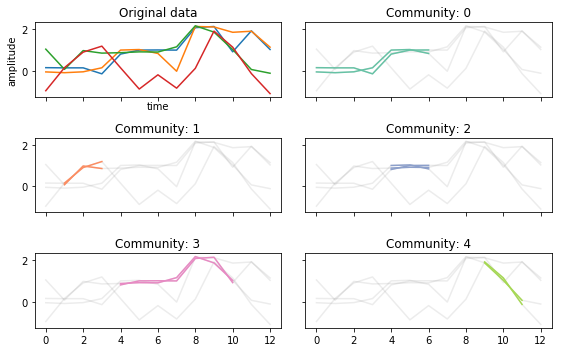

In [6]:

def community_plot(df, data): 
    nrows = int(np.ceil((len(df)+1)/2))
    fig, ax = plt.subplots(nrows, 2, sharex=True, sharey=True, figsize=(8, 2+nrows))
    ax = ax.flatten()
    p = ax[0].plot(data)
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('amplitude')
    ax[0].set_title('Original data')

    for i, row in enumerate(df.iterrows()): 
        ax[i+1].plot(data, alpha=0.15, color='gray')
        ax[i+1].plot(np.arange(row[1]['start'],row[1]['end']),data[row[1]['start']:row[1]['end'], row[1]['community']],color=plt.cm.Set2.colors[i])
        ax[i+1].set_title('Community: ' + str(i))

    plt.tight_layout()
    return fig, ax

fig, ax = community_plot(tctc_df, data)


The multiple community labels can be seed in 0 and 2 above. Where 2 contains three nodes and community 0 contains 2 nodes. 

## Changing the hyperparameters

Now we will rerun TCTC but change each of the parameters in turn and then display them on a community plot.

## Changing $\epsilon$

If we make $\epsilon$ larger, we will include more time series in a trajectory.

This however can mean that the communities you detect are less "connected" than if $\epsilon$ was smaller

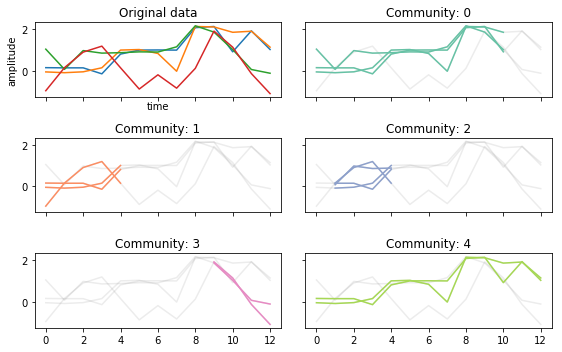

In [7]:
paramaters = {
    'epsilon': 1.5,
    'tau': 3,
    'sigma': 2,
    'kappa': 0
}
tctc_df_largeep = tctc(data, **paramaters, output='df')
fig, ax = community_plot(tctc_df_largeep, data)



## Changing $\tau$

If we make $\tau$ larger, it requires that trajectories persist for more time points.

Shorter trajectories increase the change of more noisey connections. 

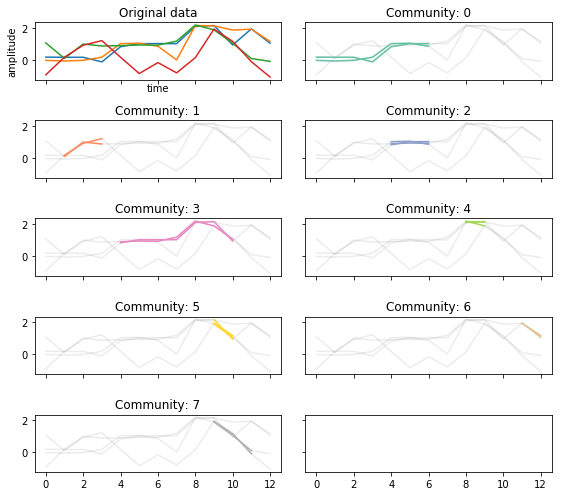

In [8]:
paramaters = {
    'epsilon': 0.5,
    'tau': 2,
    'sigma': 2,
    'kappa': 0
}
tctc_df_shorttau = tctc(data, **paramaters, output='df')
fig, ax = community_plot(tctc_df_shorttau, data)



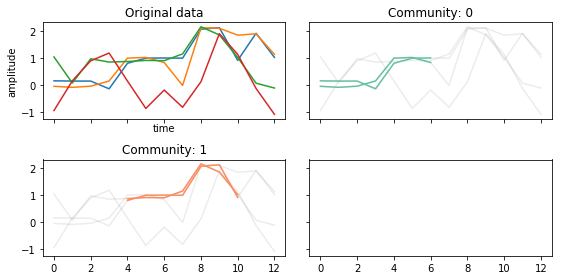

In [9]:
paramaters = {
    'epsilon': 0.5,
    'tau': 5,
    'sigma': 2,
    'kappa': 0
}
tctc_df_longtau = tctc(data, **paramaters, output='df')
fig, ax = community_plot(tctc_df_longtau, data)





## Changing $\sigma$

If we make $\sigma$ larger, it requires that more nodes are part of the trajectory.

Smaller values of $\sigma$ will result in possible noiser connections. 

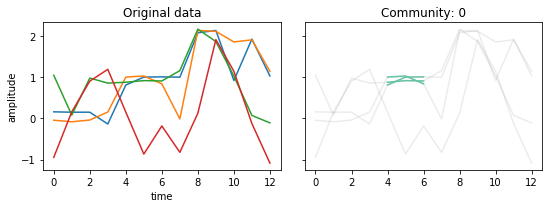

In [10]:
paramaters = {
    'epsilon': 0.5,
    'tau': 3,
    'sigma': 3,
    'kappa': 0
}
tctc_df_longsigma = tctc(data, **paramaters, output='df')
fig, ax = community_plot(tctc_df_longsigma, data)



## Changing $\kappa$

If we make $\kappa$ larger, it allows for that many number of "noisey" time-points to exist to see if the trajectory continues.

In the data we have been looking at, node 0 and 1 are close to each other except for time-point 7 and 10. If we let $\kappa$ be 1, if will ignore these time-points and allow the trajectory to continue. 

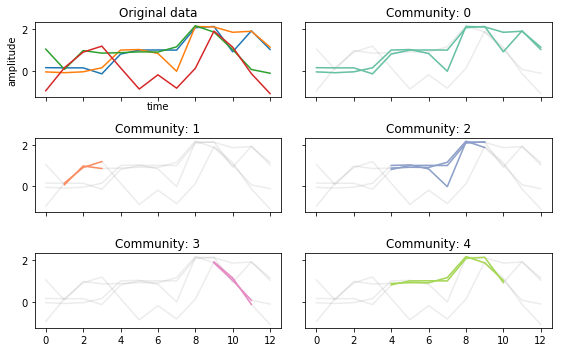

In [11]:
paramaters = {
    'epsilon': 0.5,
    'tau': 3,
    'sigma': 2,
    'kappa': 1
}
tctc_df_withkappa = tctc(data, **paramaters, output='df')
fig, ax = community_plot(tctc_df_withkappa, data)
